<a href="https://colab.research.google.com/github/learninglucky09/sklearn-classification/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io

from google.colab import files

# Importing the dataset
uploaded = files.upload()
trainDataset = pd.read_csv(io.BytesIO(uploaded['train.csv']), encoding = "ISO-8859-1")


Saving train.csv to train.csv


In [3]:
# Peek at data
trainDataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check dimensions of your data
trainDataset.shape

(891, 12)

In [5]:
#check the datatypes# 
trainDataset.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#Check the statistics number 
trainDataset.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
trainDataset.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

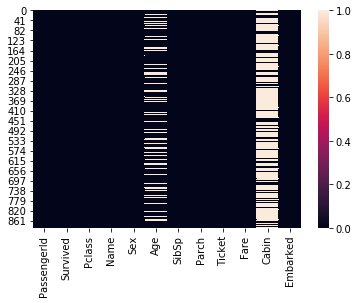

In [8]:
sns.heatmap(trainDataset.isnull())

In [0]:
# Check the distribution of features for classification problems as the data set needs to be balanced


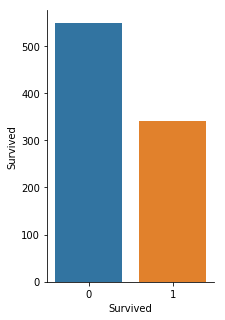

In [9]:
#distribution of Survivals

figure = plt.figure(figsize=(3,5))

sns.barplot(y=trainDataset.Survived.value_counts(), x=trainDataset.Survived)

sns.despine()

# you can also use countplot - sns.countplot(y='Survived',data=trainDataset) or #sns.countplot(y=trainDataset.Survived, data=trainDataset)



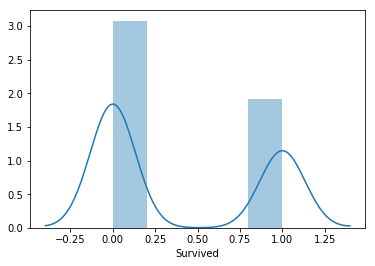

In [11]:
sns.distplot(trainDataset.Survived)

In [12]:
#Adding Survival to Features of Interest Dataframe

targetDataset = pd.DataFrame({'Survival': trainDataset.Survived})
targetDataset.head()

,Survival
0,0
1,1
2,1
3,1
4,0


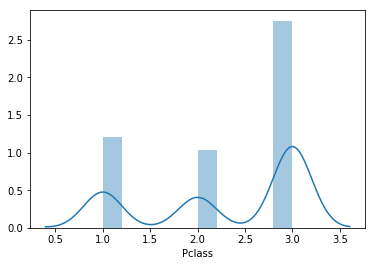

In [14]:
#Distribution of Priority Class important as it shows the balance in the data if positive/negative skewed we need to correct that it m-------showing 3 distribution classes only   -- Categorical Feature
sns.distplot(trainDataset.Pclass)

In [15]:
trainDataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Name column - it can give Mr, Miss, Mrs, Master - Married/Un-Married
targetDataset.insert(1,"YouthType", pd.DataFrame(trainDataset.Name))


In [17]:
targetDataset.YouthType=targetDataset['YouthType'].replace(to_replace= {'.*Miss.*.': 'Miss', '.*Mr.*.': 'Mr', '.*Master.*.': 'Master', '.*Mrs.*.': 'Mrs', '.*Dr.*.': 'Dr' }, regex=True)
#targetDataset.YouthType = targetDataset.YouthType.replace("*Miss.*","Mr3e3e3e")
#targetDataset.YouthType = targetDataset.YouthType.replace(regex=['.*Mr.*.'], value='Mr')
targetDataset.head(5)


targetDataset.YouthType.value_counts()

Mr                                                          645
Miss                                                        182
Master                                                       40
Dr                                                            7
Butt, Major. Archibald Willingham                             1
Kirkland, Rev. Charles Leonard                                1
Byles, Rev. Thomas Roussel Davids                             1
Weir, Col. John                                               1
Reuchlin, Jonkheer. John George                               1
Montvila, Rev. Juozas                                         1
Sagesser, Mlle. Emma                                          1
Bateman, Rev. Robert James                                    1
Harper, Rev. John                                             1
Peuchen, Major. Arthur Godfrey                                1
Carter, Rev. Ernest Courtenay                                 1
Rothes, the Countess. of (Lucy Noel Mart

In [0]:
# Apply Encoder on the independent columns with Categorical data - convert categorical data, or text data, into numbers, which our predictive models can better understand

# create a LabelEncoder object and fit it to each feature  - encode labels with value between 0 and n_classes-1.

#from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#labelencoder_X = LabelEncoder()
trainDatasetEncoded = trainDataset



#trainDatasetEncoded.iloc[:,4]=labelencoder_X.fit_transform(trainDatasetEncoded.iloc[:,4])

#trainDatasetEncoded.head(10)

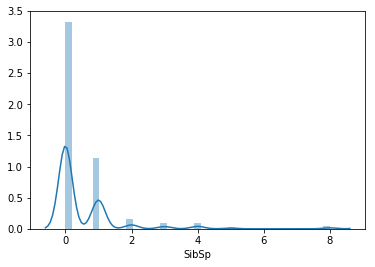

In [19]:
#distribution of Siblings 
sns.distplot(trainDatasetEncoded.SibSp)

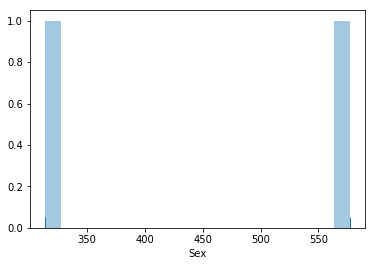

In [20]:
# distrbution of Sex
sns.distplot(trainDatasetEncoded.Sex.value_counts(),bins=20, rug=True, kde=False)

In [0]:
del trainDatasetEncoded["PassengerId"]

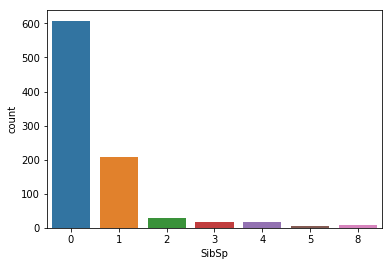

In [22]:
sns.countplot(x=trainDatasetEncoded.SibSp,data=trainDatasetEncoded)

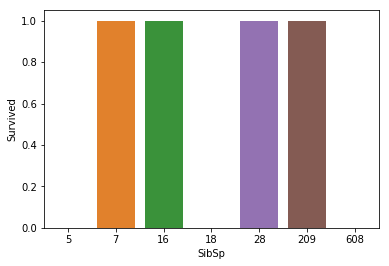

In [23]:
sns.barplot(y=trainDatasetEncoded.Survived, x=trainDatasetEncoded.SibSp.value_counts())

In [24]:
del trainDatasetEncoded["Name"]

del trainDatasetEncoded["Ticket"]

del trainDatasetEncoded["Cabin"]

trainDatasetEncoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


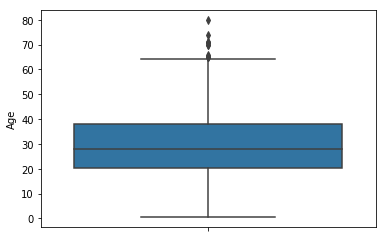

In [25]:
sns.boxplot(trainDatasetEncoded.Age, orient='v')

In [27]:
trainDatasetEncoded[trainDatasetEncoded.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


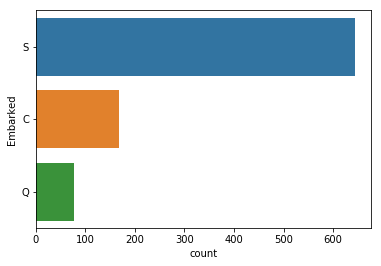

In [28]:
sns.countplot(y=trainDatasetEncoded.Embarked,data=trainDatasetEncoded)

In [0]:
trainDatasetEncoded.Embarked.fillna('S', inplace=True)

In [0]:
#trainDatasetEncoded.Embarked=labelencoder_X.fit_transform(trainDatasetEncoded.Embarked)

In [30]:
trainDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [31]:
# Handling missing value - replacing na with mean

from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values = np.nan, strategy = 'mean')

trainDatasetEncoded.iloc[:, 3]=imputer.fit_transform(pd.DataFrame(trainDatasetEncoded.iloc[:, 3]))

trainDatasetEncoded.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:

#onehotencoder=OneHotEncoder();
#trainDatasetEncoded_X=onehotencoder.fit_transform(trainDatasetEncoded.iloc[:,[1,2,4,5,7]]).toarray();


In [32]:
# Get dummies
trainDatasetEncoded = pd.get_dummies(trainDatasetEncoded, prefix_sep='_', drop_first=True, columns=["Pclass","Sex", "SibSp", "Parch", "Embarked"])
trainDatasetEncoded_X=trainDatasetEncoded.iloc[:,1:20]
trainDatasetEncoded_Y=trainDatasetEncoded.iloc[:,0]
# X head
trainDatasetEncoded_X.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


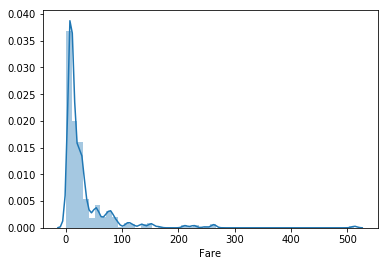

In [33]:
sns.distplot(trainDatasetEncoded.Fare)


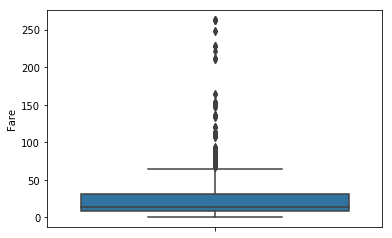

In [35]:
trainDatasetEncoded.drop(trainDatasetEncoded[ trainDatasetEncoded['Fare'] > 300 ].index, inplace=True)
sns.boxplot(trainDatasetEncoded.Fare, orient='v')

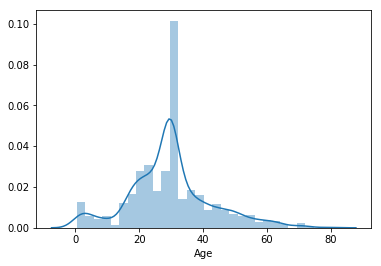

In [36]:
sns.distplot(trainDatasetEncoded.Age)

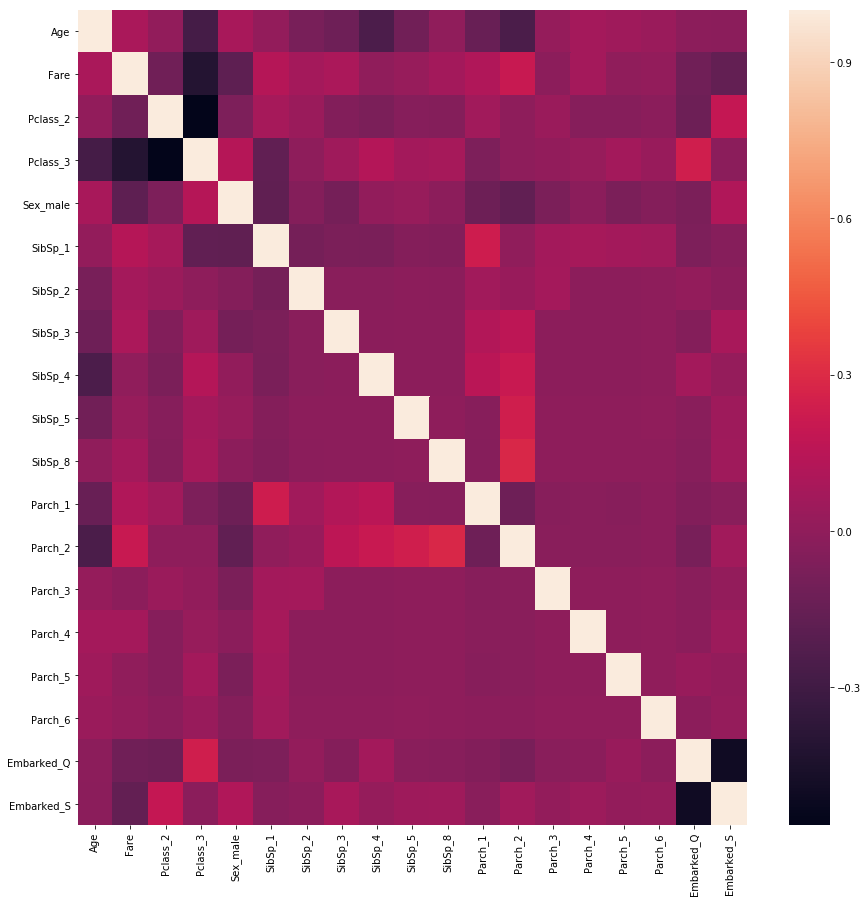

In [37]:
#See correlation among values
figure = plt.figure(figsize=(15,15))
sns.heatmap(trainDatasetEncoded_X.corr())
#plt.matshow(trainDatasetEncoded.corr())


In [0]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainDatasetEncoded_X, trainDatasetEncoded_Y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)




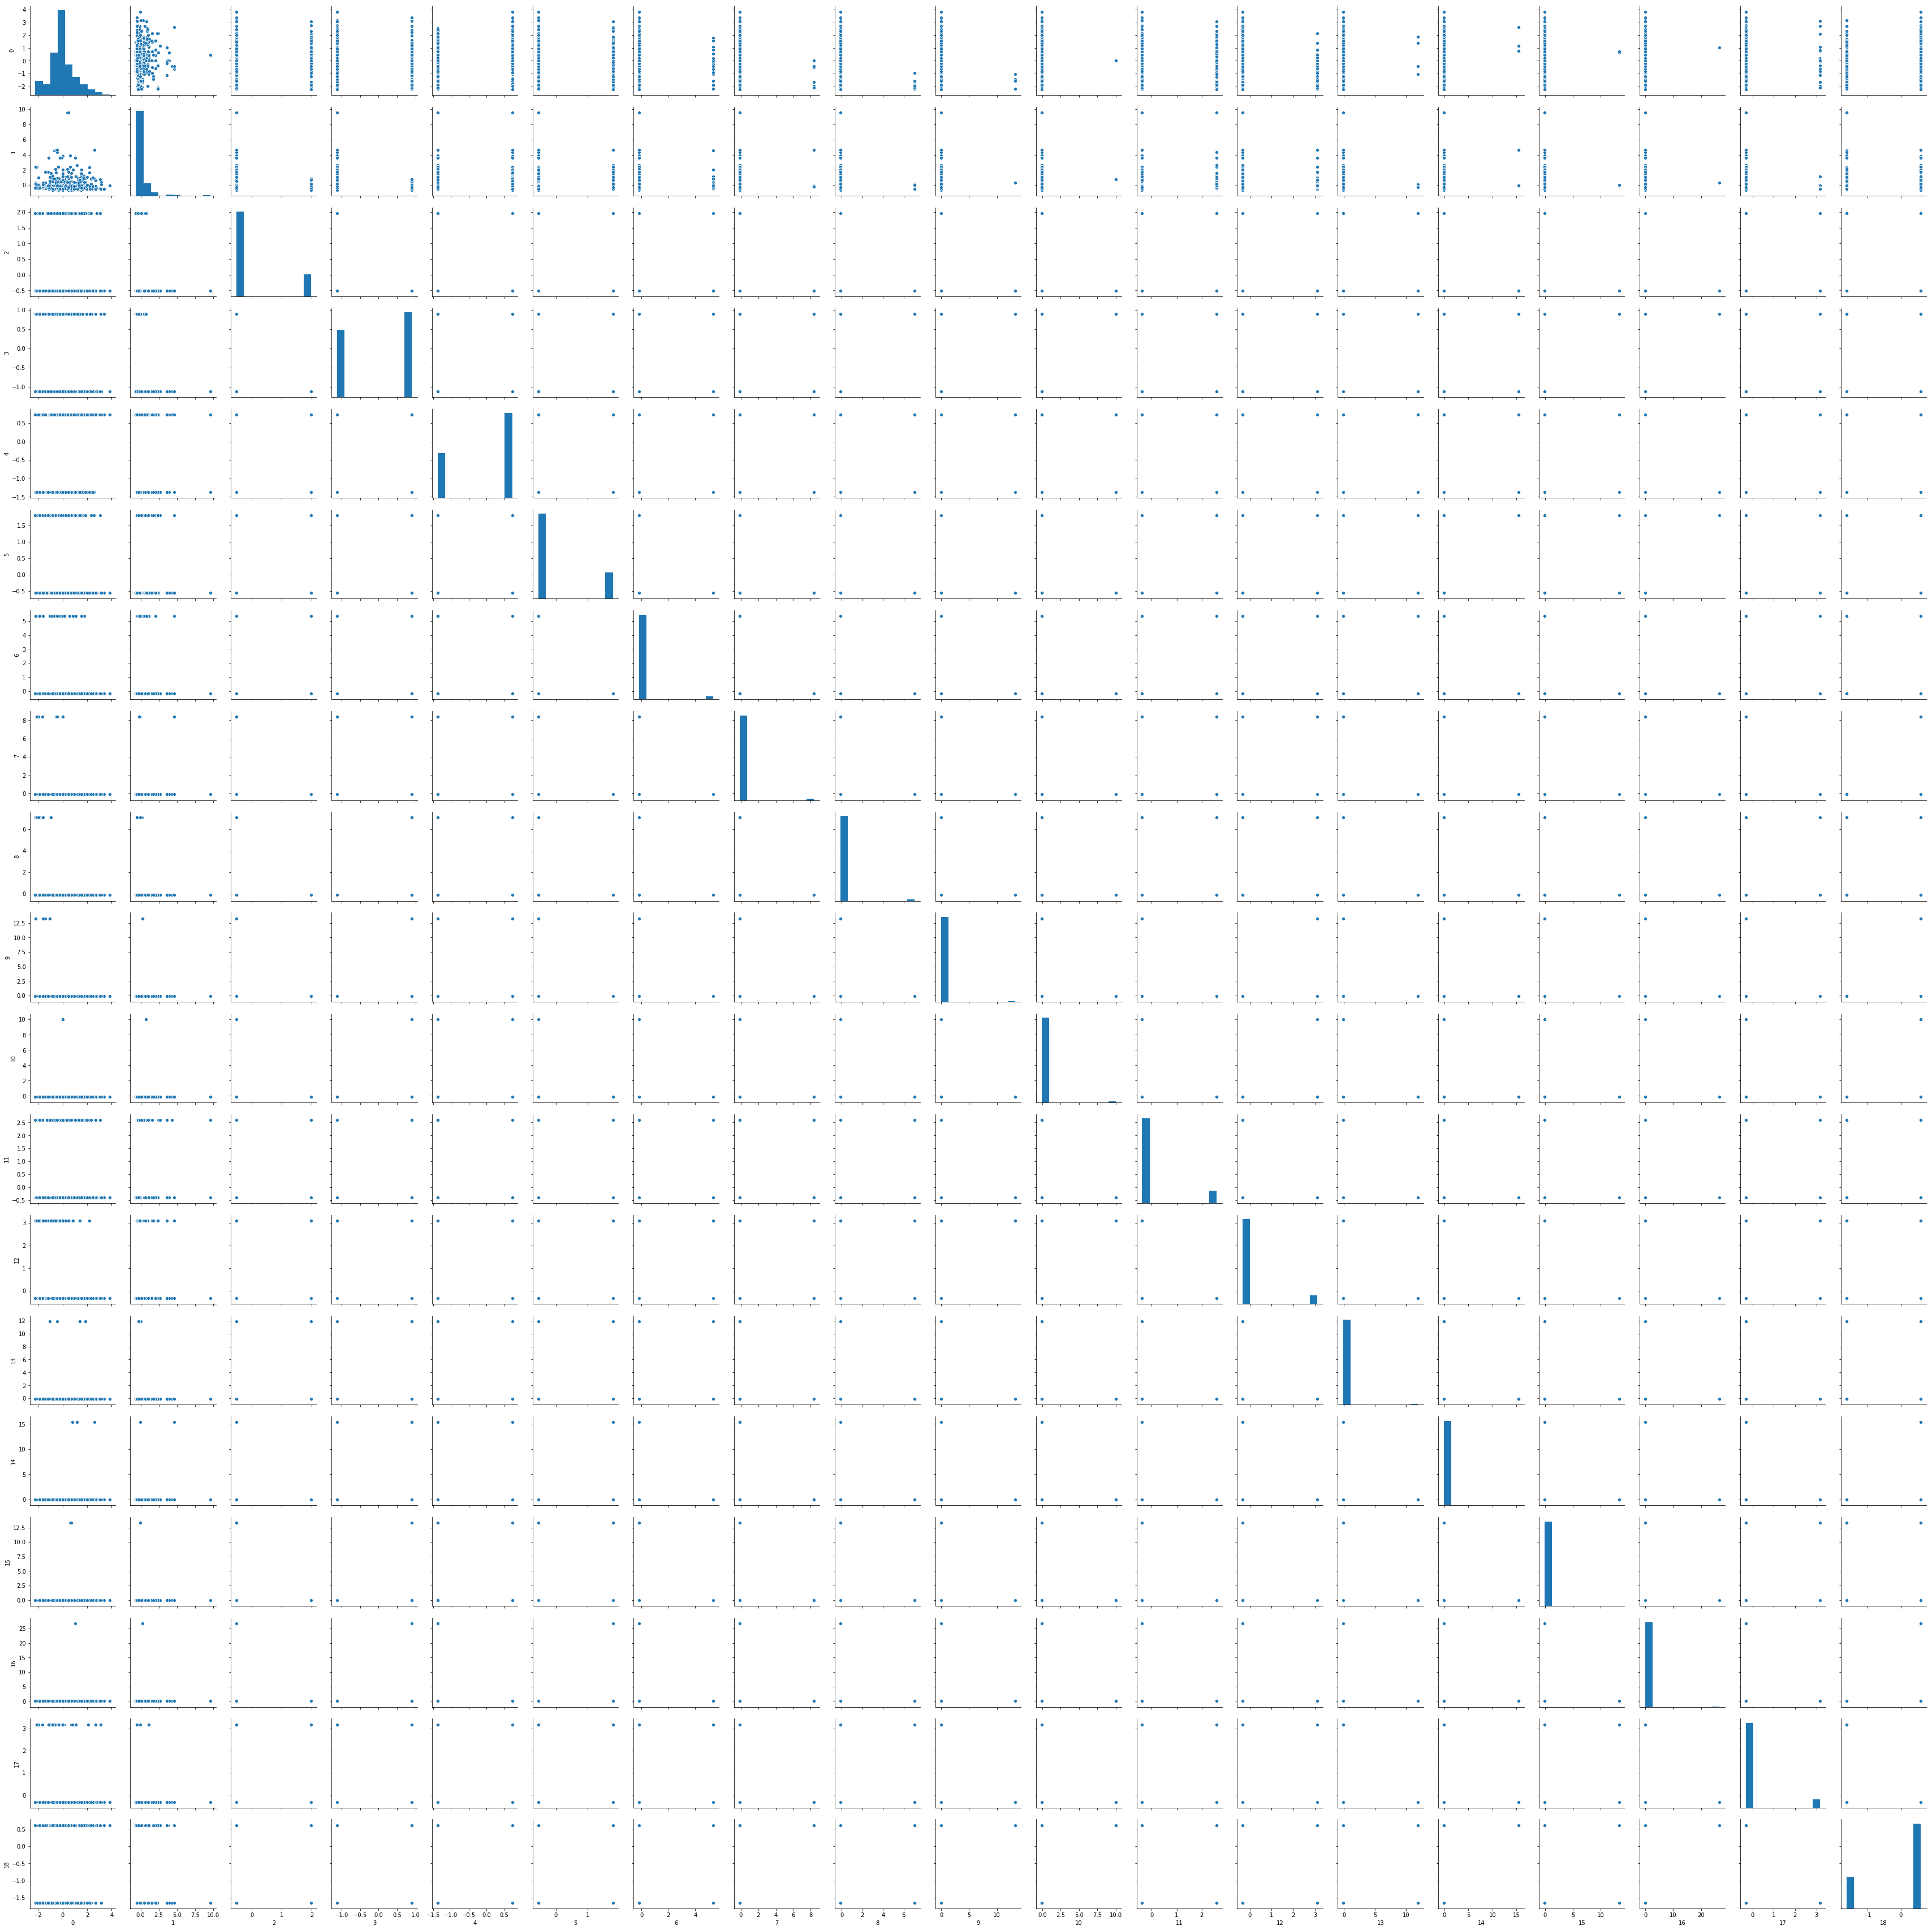

In [39]:
sns.pairplot(pd.DataFrame(X_train))

In [40]:
# PCA - principal component - Feature Extraction

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)

#X_train = pd.DataFrame(data=principalcomponents, columns=['PC1', 'PC2'])

X_test = pca.fit_transform(X_test)

#X_test = pd.DataFrame(data=principalcomponents, columns=['PC1', 'PC2'])

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.15878266, 0.11989236])

In [41]:
# plot
figure = plt.figure(figsize=(5,5))

plt.show()

<Figure size 360x360 with 0 Axes>

In [42]:
#Building Classifiers - 1. Logistic Regression

from sklearn.linear_model import LogisticRegression

logisticregression = LogisticRegression(random_state=0)

classifier = logisticregression.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# Predicting the Test set results

y_pred= classifier.predict(X_test)

In [45]:
# Create confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[106,   4],
       [ 58,  11]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


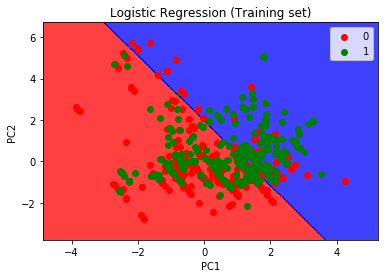

In [46]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [57]:
#Building Classifiers - 1. XGBoost

from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators=10, gamma=0.5)

classifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred=classifier.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[107,   3],
       [ 58,  11]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


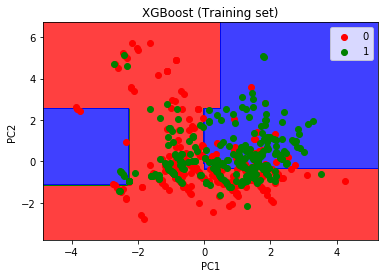

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('XGBoost (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [64]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier(n_estimators=10, n_jobs=2 )


classifier.fit(X_train, y_train)

classifier.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


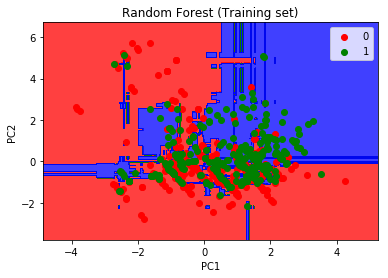

In [67]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[107,   3],
       [ 58,  11]])